##### import library

In [1]:
# !pip install kaos-0.15-py3-none-any.whl

In [2]:
import kaos

##### Define kmer length

In [3]:
kmer_length=10

##### provide ecoli file path

In [4]:
file_path_ecoli = "data_fig1/562.5708.fna"

##### Generate FCGR of original E.coli

In [5]:
print("length of sequence of ecoli is: ",  len(kaos.read_fasta(file_path_ecoli)))
fcgr_sequence_ecoli = kaos.chaos_frequency_matrix(fasta_string= kaos.read_fasta(file_path_ecoli), kmer_length = kmer_length,  pseudo_count = True)

length of sequence of ecoli is:  5025006


In [6]:
def random_permutation_with_count_preserved(input_string):



    """
    Randomly permute the characters in the input string while preserving the count of each character.

    Parameters:
        input_string (str): The input string from which characters will be permuted.

    Returns:
        str: The permuted string where characters are shuffled randomly while preserving their original counts."""

    import random
    unique_chars = sorted(set(input_string))
    char_counts = {char: input_string.count(char) for char in unique_chars}
    print("The character counts is: ", char_counts)
    
    permuted_chars = []
    
    for char in unique_chars:
        permuted_chars.extend([char] * char_counts[char])
    
    random.shuffle(permuted_chars)
    
    permuted_string = ''.join(permuted_chars)
    return permuted_string

##### generate fake FCGR

In [7]:
permuted_string1 = random_permutation_with_count_preserved(kaos.read_fasta(file_path_ecoli))
fcgr_sequence_ecoli_fake = kaos.chaos_frequency_matrix(fasta_string= permuted_string1, kmer_length=kmer_length,  pseudo_count=True)

The character counts is:  {'A': 1239016, 'C': 1275261, 'G': 1268680, 'T': 1242049}


In [8]:
def custom_figure_axis(ax, fontsize=10, show_ticks = True, rotation=90):
    
        
    """
    Customize the appearance of matplotlib axis for a figure.
    
    Parameters:
        ax (matplotlib.axes._subplots.AxesSubplot): The axis to be customized.
        fontsize (int, optional): Font size for axis labels and ticks. Default is 10.
        show_ticks (bool, optional): Whether to display ticks and labels. Default is True.
    
    Returns:
        matplotlib.axes._subplots.AxesSubplot: The customized axis.
    """
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['left'].set_linewidth(0.2)
    ax.tick_params(axis='x', labelsize=fontsize, rotation=rotation)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.tick_params(axis='both', which='both', width=0.5)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    
    if show_ticks==False:
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    return ax


##### plot heatmap of original E.coli FCGR (figure - 1g)

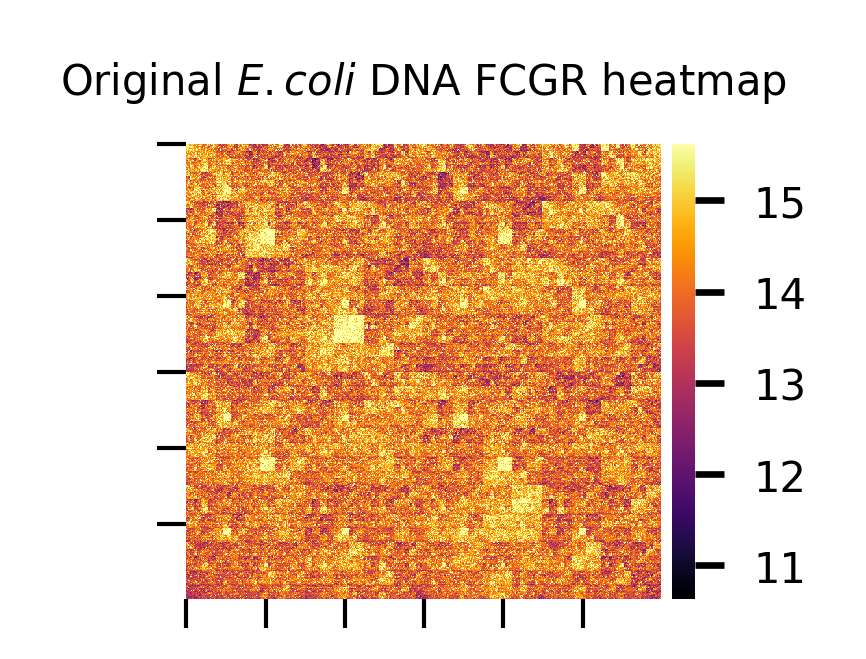

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import utility

fig, ax = plt.subplots(1, 1, figsize=(1.33, 1.2), dpi = 600)
heatmap1 =sns.heatmap(-np.log(fcgr_sequence_ecoli[0]/fcgr_sequence_ecoli[0].sum()), ax=ax, cmap= "inferno", cbar_kws={'orientation': 'vertical', 'pad': 0.02})
ax = custom_figure_axis(ax=ax, show_ticks = False, fontsize=5)
cbar1 = heatmap1.collections[0].colorbar
cbar1.ax.yaxis.set_tick_params(labelsize=5)
title = r"Original $\it{E.coli}$ DNA FCGR heatmap"

ax.set_title(title, fontsize = 5)
plt.tight_layout()
# plt.savefig("Original ecoli fcgr.png", dpi = 600)

##### plot heatmap of fake E.coli FCGR (figure - 1h)

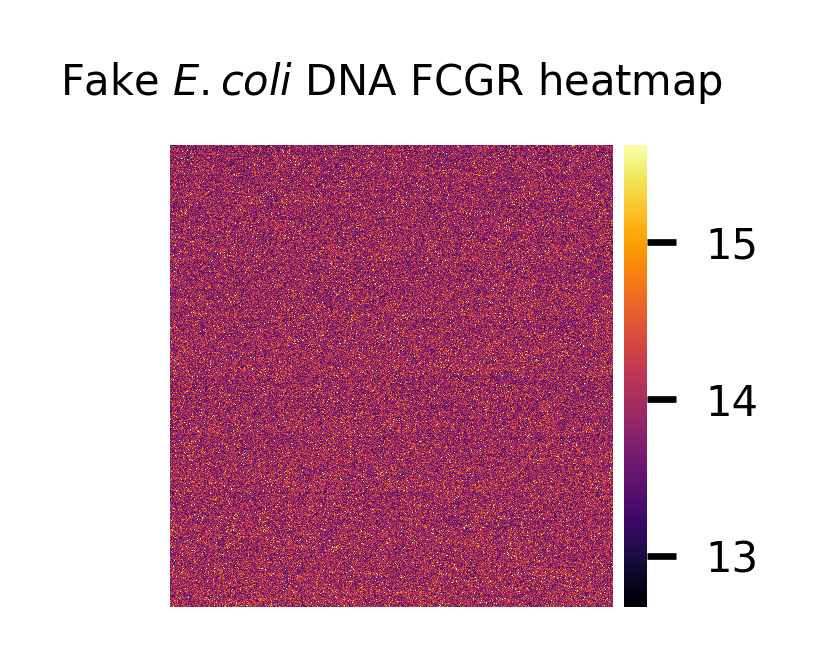

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import utility

fig, ax = plt.subplots(1, 1, figsize=(1.15, 1), dpi = 600)
heatmap1 =sns.heatmap(-np.log(fcgr_sequence_ecoli_fake[0]/fcgr_sequence_ecoli_fake[0].sum()), ax=ax, cmap= "inferno", cbar_kws={'orientation': 'vertical', 'pad': 0.02})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticks([])
# ax.set_title(str(species[counter]))
ax.tick_params(axis='x', labelsize=5, rotation=90)
ax.tick_params(axis='y', labelsize=5)
ax.tick_params(axis='both', which='both', width=0.5)
ax.xaxis.label.set_fontsize(5)
ax.yaxis.label.set_fontsize(5)
ax.title.set_fontsize(5)
# ax = custom_figure_axis(ax=ax, show_ticks = False, fontsize=5)
cbar1 = heatmap1.collections[0].colorbar
cbar1.ax.yaxis.set_tick_params(labelsize=5)
ax.set_title(None)
title = r"Fake $\it{E.coli}$ DNA FCGR heatmap"

ax.set_title(title, fontsize = 5)
# plt.tight_layout()
plt.savefig("fake ecoli fcgr.png", dpi = 600)